
# Project: Investigate a Dataset (Soccer  matches, players, and teams from several European countries)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
import os
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
1. What teams improved the most over the time period?
    The first variable is about teams. How to measure team improvement over time period (2008 - 2016).
    Some keys we can use to measure team improvement from season to another such as:
        1. build Up Play Speed Class 
        2. build Up Play Dribbling Class
        3. build Up Play Passing Class
        4. build Up Play Positioning Class
        5. Chance Creation Passing Class
        6. Chance Creation Crossing Class
        7. Chance Creation Shooting Class
        8. Chance Creation Positioning Class
        9. Defence Pressure Class
        10. Defence Aggression Class
        11. Defence Team Width Class
        12. Defence Defender Line Class
2.  Which players had the most penalties?
    Try to find the player who got the most penalties over provided seasons.
3. What team attributes lead to the most victories? 
    Need to know attributes of team that achieve the most victories over the provided seasons.
### General Properties

In [2]:
Teamdf = pd.read_csv('Database_Soccer/Team.csv')
Team_Attributesdf = pd.read_csv('Database_Soccer/Team_Attributes.csv')
#Matchesdf = pd.read_csv('Database_Soccer/Match.csv')
Team_Attributesdf.head()


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [31]:
Teamdf.shape


(299, 5)

Data contains 299 row over 5 columns (variables).

In [32]:
Teamdf.duplicated().sum()

0

There is no duplicated rows in data.

In [33]:
Teamdf["team_api_id"].nunique()

299

There is no duplicate values in column (team_api_id) that we will join on it.

In [34]:
Team_Attributesdf.shape


(1458, 25)

Data contains 1458 row over 25 columns (variables).

In [35]:
Team_Attributesdf.duplicated().sum()

0

There is no duplicated rows in data.

In [36]:
Team_Attributesdf["team_api_id"].nunique()

288

There are 288 in column (team_api_id) are unique from 299 in team table and 1170 rows are duplicated.

In [37]:
Team_Attributesdf.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [71]:
#Attributes that have real values
print(Team_Attributesdf[Team_Attributesdf['buildUpPlaySpeed'].isna()])
print(Team_Attributesdf[Team_Attributesdf['buildUpPlayPassing'].isnull()])
print(Team_Attributesdf[Team_Attributesdf['chanceCreationPassing'].isna()])
print(Team_Attributesdf[Team_Attributesdf['chanceCreationCrossing'].isna()])
print(Team_Attributesdf[Team_Attributesdf['chanceCreationShooting'].isna()])
print(Team_Attributesdf[Team_Attributesdf['defencePressure'].isna()])
print(Team_Attributesdf[Team_Attributesdf['defenceAggression'].isna()])
print(Team_Attributesdf[Team_Attributesdf['defenceTeamWidth'].isna()])

#Attributes that have nan values
print(Team_Attributesdf[Team_Attributesdf['buildUpPlayDribbling'].isna()])


Empty DataFrame
Columns: [id_x, team_fifa_api_id_x, team_api_id, date, buildUpPlaySpeed, buildUpPlaySpeedClass, buildUpPlayDribbling, buildUpPlayDribblingClass, buildUpPlayPassing, buildUpPlayPassingClass, buildUpPlayPositioningClass, chanceCreationPassing, chanceCreationPassingClass, chanceCreationCrossing, chanceCreationCrossingClass, chanceCreationShooting, chanceCreationShootingClass, chanceCreationPositioningClass, defencePressure, defencePressureClass, defenceAggression, defenceAggressionClass, defenceTeamWidth, defenceTeamWidthClass, defenceDefenderLineClass, id_y, team_fifa_api_id_y, team_long_name, team_short_name, year]
Index: []

[0 rows x 30 columns]
Empty DataFrame
Columns: [id_x, team_fifa_api_id_x, team_api_id, date, buildUpPlaySpeed, buildUpPlaySpeedClass, buildUpPlayDribbling, buildUpPlayDribblingClass, buildUpPlayPassing, buildUpPlayPassingClass, buildUpPlayPositioningClass, chanceCreationPassing, chanceCreationPassingClass, chanceCreationCrossing, chanceCreationCross

### Data Cleaning

In [3]:
Team_Attributesdf = pd.merge(Team_Attributesdf , Teamdf , on='team_api_id' , how='left')
Team_Attributesdf.head()


,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Medium,55,Press,45,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Medium,70,Double,70,Wide,Cover,39393,77.0,Aberdeen,ABE
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Medium,47,Press,52,Normal,Cover,39393,77.0,Aberdeen,ABE


I merged Team long name and Team short name to worked dataframe to facilitate reading data in visualization.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
1. First attribute is : Build Up Play Speed

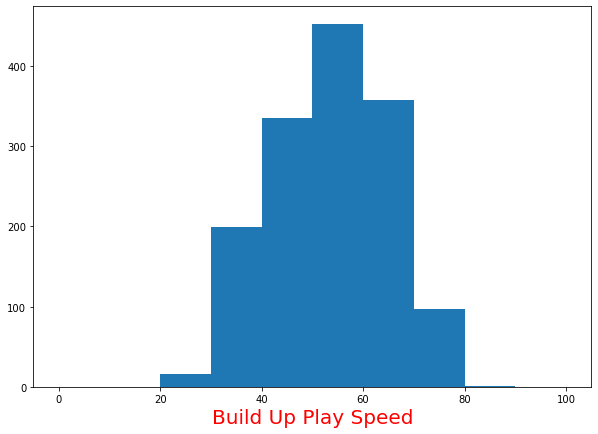

     team_short_name  year buildUpPlaySpeed buildUpPlaySpeedClass
26               ACA  2015               53              Balanced
58               ARK  2011               46              Balanced
64               ARL  2015               56              Balanced
67               BIE  2014               62              Balanced
177              BLB  2015               60              Balanced
184              BOA  2015               47              Balanced
190              BOC  2015               69                  Fast
265              CAG  2015               67                  Fast
275              CAP  2015               80                  Fast
341              DAR  2015               59              Balanced
364              DUN  2012               55              Balanced
388              EMP  2015               66              Balanced
403              EUP  2011               50              Balanced
418              FAL  2010               70                  Fast
431       

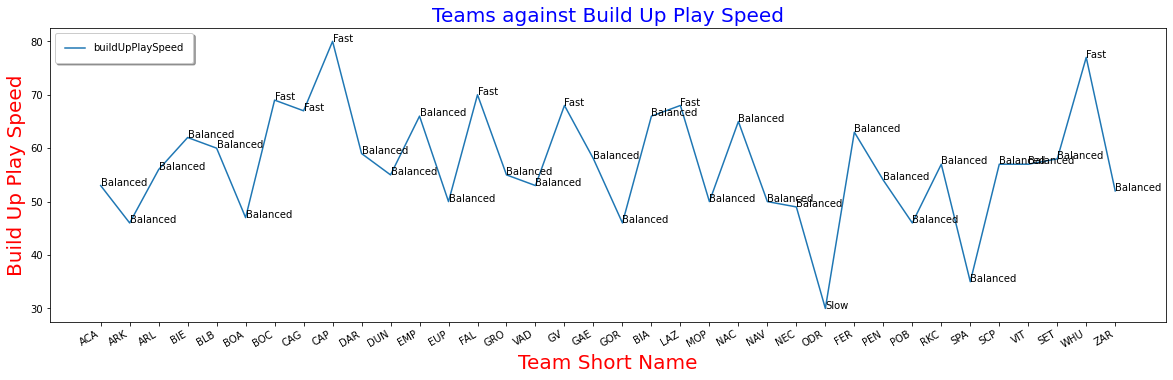

In [36]:
#Extract year from date
Team_Attributesdf['date'] = pd.to_datetime(Team_Attributesdf['date'])
Team_Attributesdf['year'] = Team_Attributesdf['date'].dt.year

#df from needed columns only
Speeddf = Team_Attributesdf[['year' , 'team_short_name' , 'buildUpPlaySpeed' , 'buildUpPlaySpeedClass']]#.head(10)
Years = [2008 , 2009 , 2010 , 2011 , 2012 , 2013 , 2014 , 2015 , 2016]
Teams = np.array(Speeddf['team_short_name'].unique())

#Form Histogram of Build Up Play Speed
def HitogramAttribute(Column , xColumnText):
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(np.array(Column) , bins = [0 , 10 , 20 , 30 , 40 , 50 , 60 , 70 , 80 , 90 , 100])
    plt.xlabel(xColumnText , fontsize=(20) , color='red')
    #plt.ylabel(yColumnText , fontsize=(20) , color='red')
    plt.show()
    
HitogramAttribute(Team_Attributesdf['buildUpPlaySpeed'] , 'Build Up Play Speed')
    
#df for the highest score in Build Up Play Speed team
Columns_Names = ['team_short_name' , 'year' , 'buildUpPlaySpeed' , 'buildUpPlaySpeedClass']
ImprovedTeamsdf = pd.DataFrame(columns = Columns_Names)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = Speeddf[Speeddf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['buildUpPlaySpeed'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsdf = ImprovedTeamsdf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsdf)

#line chart for improved team that enhanced their build up play speed through season they played
def VisualizeData(ChartType , Xaxisdf , XlabelsColumn , Xplot , yplot , PointsLabelColumn , xTitle , yTitle , ChartTitle):
    Xaxis = range(len(Xaxisdf))
    Xlabels = np.array(XlabelsColumn)
    fig , ax = plt.subplots(figsize=(20 , 6))
    Xaxisdf.plot(kind = ChartType, x = Xplot , y = yplot , ax = ax)
    LabelArray = np.array(Xaxisdf[PointsLabelColumn])
    PointArray = np.array(Xaxisdf[yplot])
    for i , txt in enumerate(LabelArray):
        plt.text(i , PointArray[i] , LabelArray[i])
    plt.xticks(Xaxis , Xlabels)
    fig.autofmt_xdate()
    plt.legend(fancybox=True , framealpha=1 , shadow=True , borderpad=1)
    plt.title(ChartTitle , fontsize=(20) , color='blue')
    plt.xlabel(xTitle , fontsize=(20) , color='red')
    plt.ylabel(yTitle , fontsize=(20) , color='red')
    plt.show()

VisualizeData('line' , ImprovedTeamsdf , np.array(ImprovedTeamsdf['team_short_name']) , 'team_short_name' , 'buildUpPlaySpeed' , 'buildUpPlaySpeedClass' , 'Team Short Name' , 'Build Up Play Speed' , 'Teams against Build Up Play Speed')



Get only teams improved in their Build Up Play Speed over provided seasons.
</br> CAP team scored the fastest in speed : 80

<a id='eda'></a>
## Follow : Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
2. Second attribute is : Build Up Play Dribbling

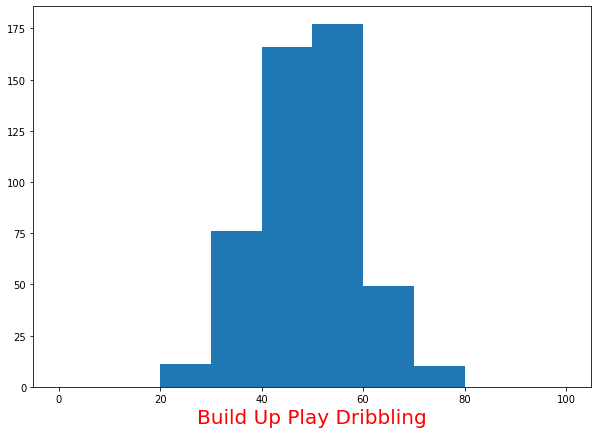

Empty DataFrame
Columns: [team_short_name, year, buildUpPlayDribbling, buildUpPlayDribblingClass]
Index: []
     team_short_name  year  buildUpPlayDribbling buildUpPlayDribblingClass
67               BIE  2014                  49.0                    Normal
81               AVL  2015                  37.0                    Normal
93               BIL  2015                  46.0                    Normal
105              AUG  2015                  51.0                    Normal
117              ALK  2015                  46.0                    Normal
...              ...   ...                   ...                       ...
1397             WID  2014                  52.0                    Normal
1403             WIG  2015                  37.0                    Normal
1407             WII  2015                  36.0                    Normal
1443             ZAG  2014                  49.0                    Normal
1449             ZAR  2015                  52.0                   

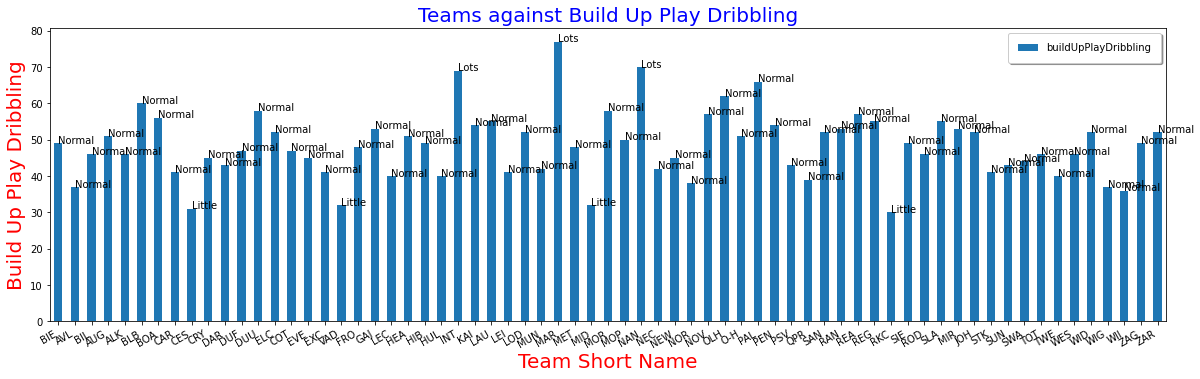

In [39]:
#df from needed columns only
Dribblingdf = Team_Attributesdf[['year' , 'team_short_name' , 'buildUpPlayDribbling' , 'buildUpPlayDribblingClass']]#.head(10)
Dribblingdf = Dribblingdf.dropna()

#Form Histogram of Build Up Play Dribbling
HitogramAttribute(Team_Attributesdf['buildUpPlayDribbling'] , 'Build Up Play Dribbling')

#df for the highest score in Build Up Play Speed team
ColumnsDribbling_Names = ['team_short_name' , 'year' , 'buildUpPlayDribbling' , 'buildUpPlayDribblingClass']
ImprovedTeamsDribblingdf = pd.DataFrame(columns = ColumnsDribbling_Names)
print(ImprovedTeamsDribblingdf)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = Dribblingdf[Dribblingdf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['buildUpPlayDribbling'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsDribblingdf = ImprovedTeamsDribblingdf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsDribblingdf)

#line chart for improved team that enhanced their build up play speed through season they played
VisualizeData('bar' , ImprovedTeamsDribblingdf , np.array(ImprovedTeamsDribblingdf['team_short_name']) , 'team_short_name' , 'buildUpPlayDribbling' , 'buildUpPlayDribblingClass' , 'Team Short Name' , 'Build Up Play Dribbling' , 'Teams against Build Up Play Dribbling')


Get only teams improved in their Build Up Play Dribbling over provided seasons.
</br>
MET team scored the lots in dribbling : more than 70.

<a id='eda'></a>
## Follow : Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
3. Third attribute is : Build Up Play Passing

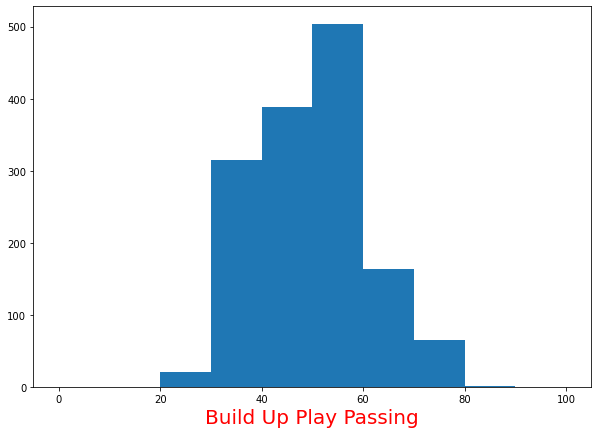

Empty DataFrame
Columns: [team_short_name, year, buildUpPlayPassing, buildUpPlayPassingClass]
Index: []
     team_short_name  year buildUpPlayPassing buildUpPlayPassingClass
32               HAA  2015                 66                   Mixed
117              ALK  2015                 58                   Mixed
129              BAR  2015                 65                   Mixed
1140             BAS  2015                 52                   Mixed
730              LEV  2015                 65                   Mixed
184              BOA  2015                 50                   Mixed
208              BOR  2015                 48                   Mixed
425              DOR  2015                 62                   Mixed
267              CAM  2015                 57                   Mixed
275              CAP  2015                 65                   Mixed
341              DAR  2015                 77                    Long
364              DUN  2012                 60           

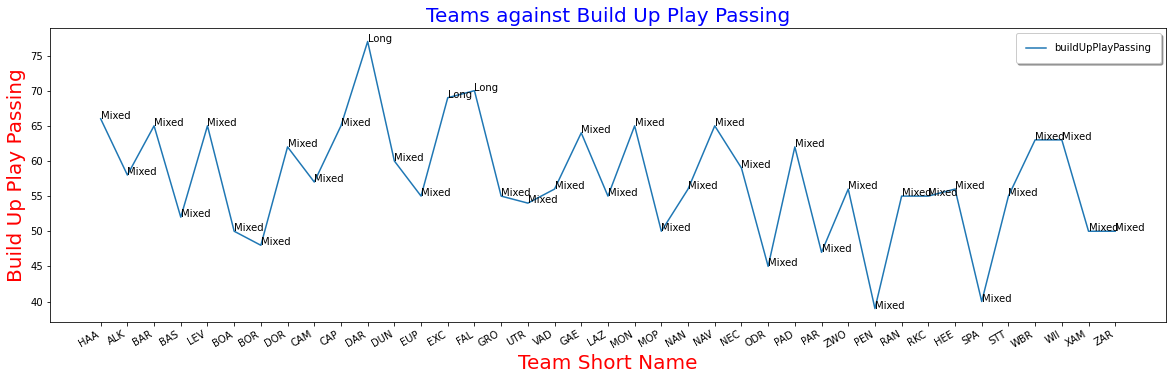

In [40]:
#df from needed columns only
Passingdf = Team_Attributesdf[['year' , 'team_short_name' , 'buildUpPlayPassing' , 'buildUpPlayPassingClass']]#.head(10)
Passingdf = Passingdf.dropna()

#Form Histogram of Build Up Play Passing
HitogramAttribute(Team_Attributesdf['buildUpPlayPassing'] , 'Build Up Play Passing')

#df for the highest score in build Up Play Passing team
ColumnsPassing_Names = ['team_short_name' , 'year' , 'buildUpPlayPassing' , 'buildUpPlayPassingClass']
ImprovedTeamsPassingdf = pd.DataFrame(columns = ColumnsPassing_Names)
print(ImprovedTeamsPassingdf)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = Passingdf[Passingdf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['buildUpPlayPassing'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsPassingdf = ImprovedTeamsPassingdf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsPassingdf)

#line chart for improved team that enhanced their build up play speed through season they played
VisualizeData('line' , ImprovedTeamsPassingdf , np.array(ImprovedTeamsPassingdf['team_short_name']) , 'team_short_name' , 'buildUpPlayPassing' , 'buildUpPlayPassingClass' , 'Team Short Name' , 'Build Up Play Passing' , 'Teams against Build Up Play Passing')

Get only teams improved in their Build Up Play Passing over provided seasons.
</br>
DAR team scored the longest in passing : more than 75.

<a id='eda'></a>
## Follow : Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
4. Fourth attribute is : Chance Creation Passing

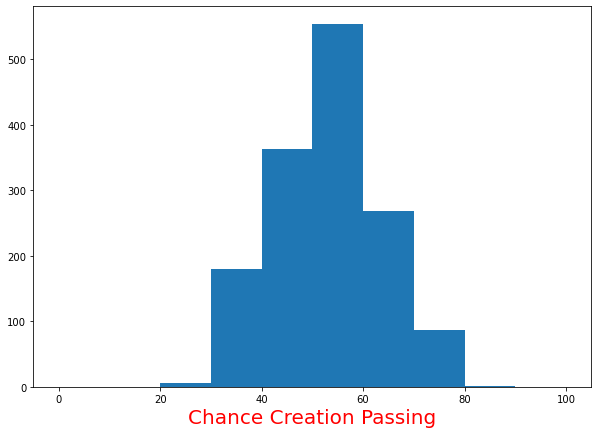

Empty DataFrame
Columns: [team_short_name, year, chanceCreationPassing, chanceCreationPassingClass]
Index: []
     team_short_name  year chanceCreationPassing chanceCreationPassingClass
67               BIE  2014                    56                     Normal
184              BOA  2015                    37                     Normal
190              BOC  2015                    66                     Normal
265              CAG  2015                    69                      Risky
275              CAP  2015                    70                      Risky
341              DAR  2015                    52                     Normal
364              DUN  2012                    46                     Normal
403              EUP  2011                    50                     Normal
418              FAL  2010                    60                     Normal
444              VAD  2015                    38                     Normal
477              FRO  2015                    51      

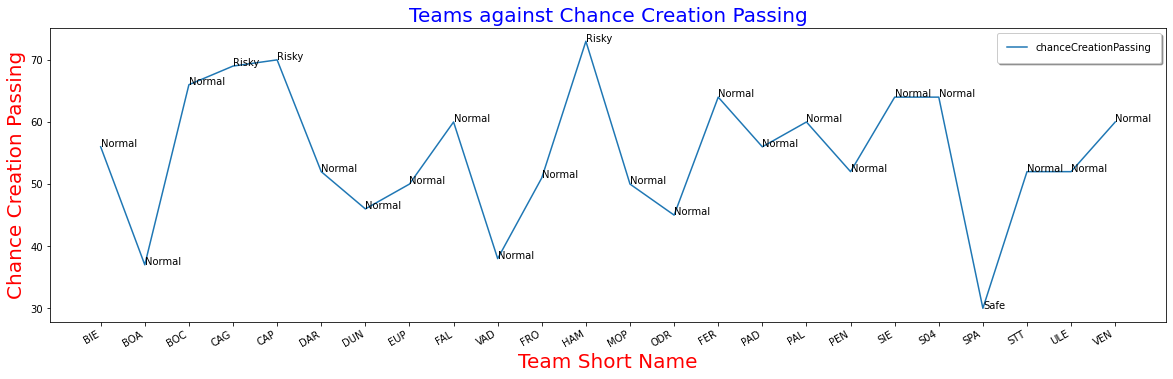

In [41]:
#df from needed columns only
CreationPassingdf = Team_Attributesdf[['year' , 'team_short_name' , 'chanceCreationPassing' , 'chanceCreationPassingClass']]#.head(10)
CreationPassingdf = CreationPassingdf.dropna()

#Form Histogram of Chance Creation Passing
HitogramAttribute(Team_Attributesdf['chanceCreationPassing'] , 'Chance Creation Passing')

#df for the highest score in build Up Play Passing team
ColumnsCreationPassing_Names = ['team_short_name' , 'year' , 'chanceCreationPassing' , 'chanceCreationPassingClass']
ImprovedTeamsCreationPassingdf = pd.DataFrame(columns = ColumnsCreationPassing_Names)
print(ImprovedTeamsCreationPassingdf)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = CreationPassingdf[CreationPassingdf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['chanceCreationPassing'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsCreationPassingdf = ImprovedTeamsCreationPassingdf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsCreationPassingdf)

#line chart for improved team that enhanced their build up play speed through season they played
VisualizeData('line' , ImprovedTeamsCreationPassingdf , np.array(ImprovedTeamsCreationPassingdf['team_short_name']) , 'team_short_name' , 'chanceCreationPassing' , 'chanceCreationPassingClass' , 'Team Short Name' , 'Chance Creation Passing' , 'Teams against Chance Creation Passing')


Get only teams improved in their Chance for create Passing over provided seasons.
</br>
SPA team scored the most safe in creation passing : less than 30.

<a id='eda'></a>
## Follow : Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
5. Fifth attribute is : Chance Creation Crossing

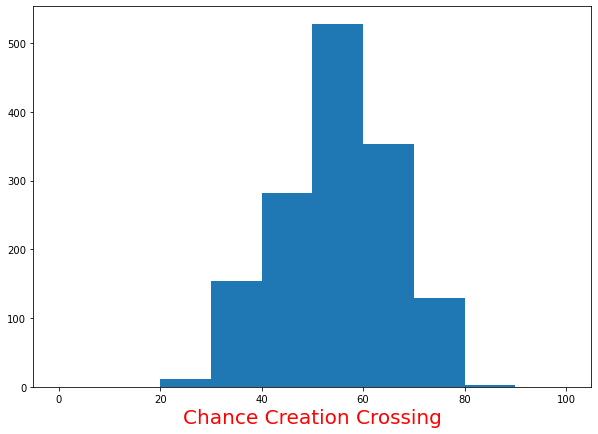

Empty DataFrame
Columns: [team_short_name, year, chanceCreationCrossing, chanceCreationCrossingClass]
Index: []
     team_short_name  year chanceCreationCrossing chanceCreationCrossingClass
8                ABE  2015                     72                        Lots
58               ARK  2011                     62                      Normal
184              BOA  2015                     38                      Normal
425              DOR  2015                     66                      Normal
275              CAP  2015                     40                      Normal
341              DAR  2015                     77                        Lots
357              DUF  2015                     61                      Normal
364              DUN  2012                     68                        Lots
403              EUP  2011                     55                      Normal
418              FAL  2010                     70                        Lots
444              VAD  2015    

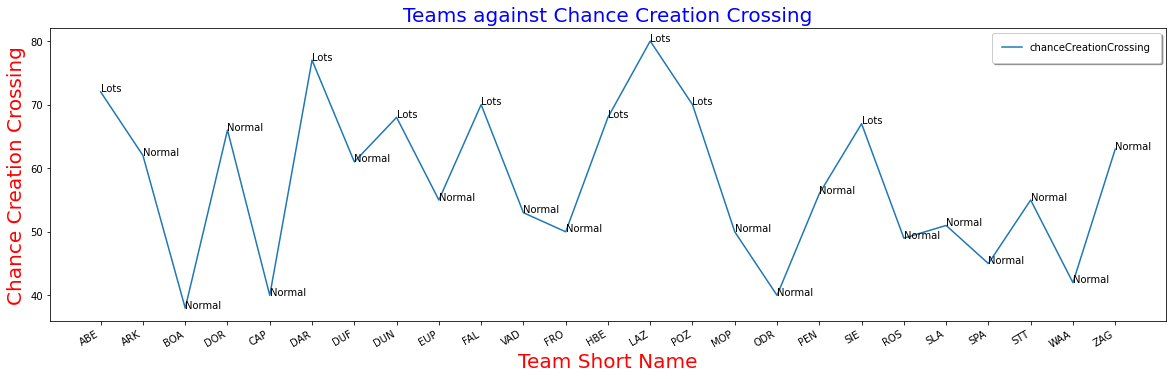

In [42]:
#df from needed columns only
Crossingdf = Team_Attributesdf[['year' , 'team_short_name' , 'chanceCreationCrossing' , 'chanceCreationCrossingClass']]#.head(10)
Crossingdf = Crossingdf.dropna()

#Form Histogram of Chance Creation Crossing
HitogramAttribute(Team_Attributesdf['chanceCreationCrossing'] , 'Chance Creation Crossing')

#df for the highest score in build Up Play Passing team
ColumnsCrossing_Names = ['team_short_name' , 'year' , 'chanceCreationCrossing' , 'chanceCreationCrossingClass']
ImprovedTeamsCrossingdf = pd.DataFrame(columns = ColumnsCrossing_Names)
print(ImprovedTeamsCrossingdf)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = Crossingdf[Crossingdf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['chanceCreationCrossing'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsCrossingdf = ImprovedTeamsCrossingdf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsCrossingdf)

#line chart for improved team that enhanced their build up play speed through season they played
VisualizeData('line' , ImprovedTeamsCrossingdf , np.array(ImprovedTeamsCrossingdf['team_short_name']) , 'team_short_name' , 'chanceCreationCrossing' , 'chanceCreationCrossingClass' , 'Team Short Name' , 'Chance Creation Crossing' , 'Teams against Chance Creation Crossing')

Get only teams improved in their Chance for create Crossing over provided seasons.
</br>
LAZ team scored the lots in creation crossing : more than 70.

<a id='eda'></a>
## Follow : Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
6. Sixth attribute is : Chance Creation Shooting

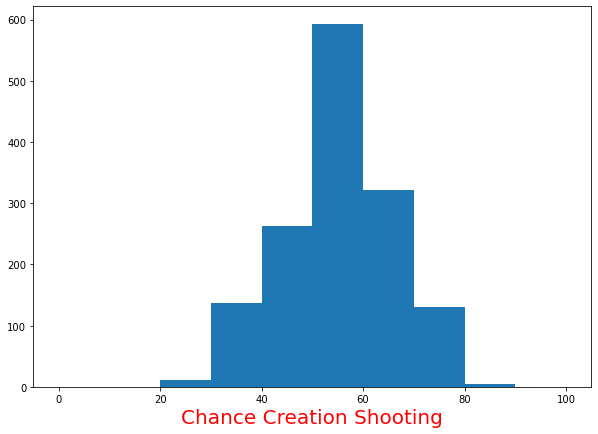

Empty DataFrame
Columns: [team_short_name, year, chanceCreationShooting, chanceCreationShootingClass]
Index: []
     team_short_name  year chanceCreationShooting chanceCreationShootingClass
67               BIE  2014                     52                      Normal
184              BOA  2015                     53                      Normal
190              BOC  2015                     66                      Normal
265              CAG  2015                     69                        Lots
341              DAR  2015                     45                      Normal
357              DUF  2015                     65                      Normal
364              DUN  2012                     54                      Normal
388              EMP  2015                     63                      Normal
393              COT  2014                     56                      Normal
403              EUP  2011                     55                      Normal
409              EVE  2015    

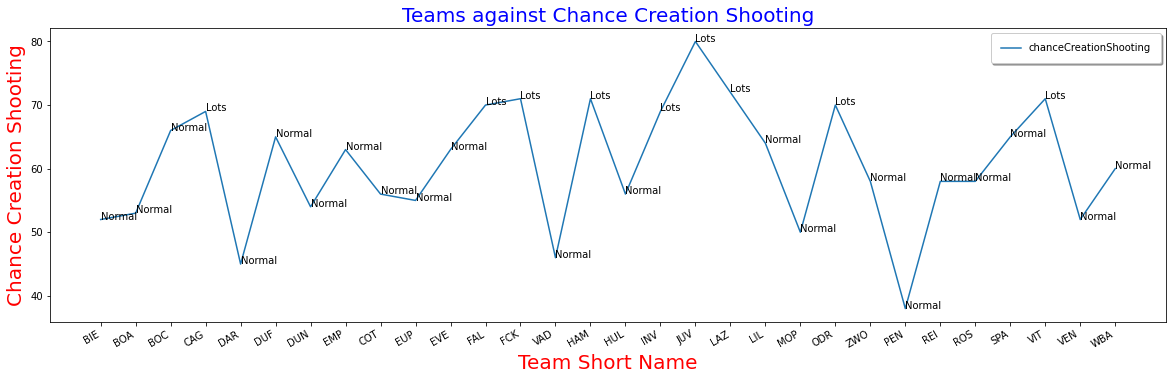

In [43]:
#df from needed columns only
Shootingdf = Team_Attributesdf[['year' , 'team_short_name' , 'chanceCreationShooting' , 'chanceCreationShootingClass']]#.head(10)
Shootingdf = Shootingdf.dropna()

#Form Histogram of Chance Creation Shooting
HitogramAttribute(Team_Attributesdf['chanceCreationShooting'] , 'Chance Creation Shooting')

#df for the highest score in build Up Play Passing team
ColumnsShooting_Names = ['team_short_name' , 'year' , 'chanceCreationShooting' , 'chanceCreationShootingClass']
ImprovedTeamsShootingdf = pd.DataFrame(columns = ColumnsShooting_Names)
print(ImprovedTeamsShootingdf)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = Shootingdf[Shootingdf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['chanceCreationShooting'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsShootingdf = ImprovedTeamsShootingdf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsShootingdf)

#line chart for improved team that enhanced their build up play speed through season they played
VisualizeData('line' , ImprovedTeamsShootingdf , np.array(ImprovedTeamsShootingdf['team_short_name']) , 'team_short_name' , 'chanceCreationShooting' , 'chanceCreationShootingClass' , 'Team Short Name' , 'Chance Creation Shooting' , 'Teams against Chance Creation Shooting')

Get only teams improved in their Chance for create Shooting over provided seasons.
</br>
JUV team scored the lots in creation shooting : 80.

<a id='eda'></a>
## Follow : Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
7. Seventh attribute is : Defence Pressure

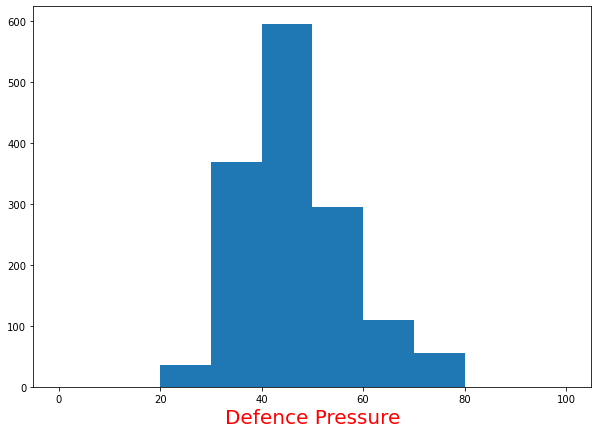

Empty DataFrame
Columns: [team_short_name, year, defencePressure, defencePressureClass]
Index: []
     team_short_name  year defencePressure defencePressureClass
64               ARL  2015              48               Medium
69               ARO  2015              37               Medium
93               BIL  2015              49               Medium
147              BMU  2015              72                 High
184              BOA  2015              32                 Deep
190              BOC  2015              58               Medium
208              BOR  2015              57               Medium
265              CAG  2015              65               Medium
341              DAR  2015              32                 Deep
357              DUF  2015              50               Medium
364              DUN  2012              42               Medium
403              EUP  2011              50               Medium
417              EXC  2015              29                 Deep
418   

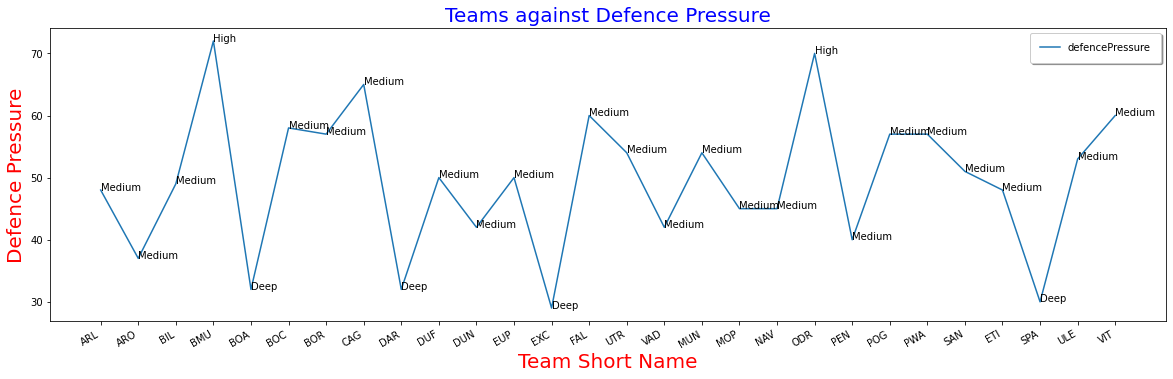

In [44]:
#df from needed columns only
Pressuredf = Team_Attributesdf[['year' , 'team_short_name' , 'defencePressure' , 'defencePressureClass']]#.head(10)
Pressuredf = Pressuredf.dropna()

#Form Histogram of Defence Pressure
HitogramAttribute(Team_Attributesdf['defencePressure'] , 'Defence Pressure')

#df for the highest score in build Up Play Passing team
ColumnsPressure_Names = ['team_short_name' , 'year' , 'defencePressure' , 'defencePressureClass']
ImprovedTeamsPressuredf = pd.DataFrame(columns = ColumnsPressure_Names)
print(ImprovedTeamsPressuredf)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = Pressuredf[Pressuredf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['defencePressure'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsPressuredf = ImprovedTeamsPressuredf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsPressuredf)

#line chart for improved team that enhanced their build up play speed through season they played
VisualizeData('line' , ImprovedTeamsPressuredf , np.array(ImprovedTeamsPressuredf['team_short_name']) , 'team_short_name' , 'defencePressure' , 'defencePressureClass' , 'Team Short Name' , 'Defence Pressure' , 'Teams against Defence Pressure')


Get only teams improved in their Defence Pressure over provided seasons.
</br>
BMU team scored the highest in defence pressure : more than 70.

<a id='eda'></a>
## Follow : Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
8. Eighth attribute is : Defence Aggression

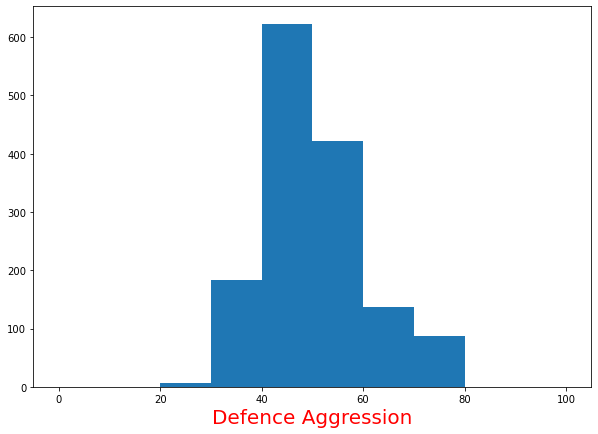

Empty DataFrame
Columns: [team_short_name, year, defenceAggression, defenceAggressionClass]
Index: []
     team_short_name  year defenceAggression defenceAggressionClass
67               BIE  2014                54                  Press
69               ARO  2015                39                  Press
184              BOA  2015                62                  Press
265              CAG  2015                65                  Press
275              CAP  2015                55                  Press
341              DAR  2015                56                  Press
364              DUN  2012                43                  Press
388              EMP  2015                66                  Press
403              EUP  2011                50                  Press
418              FAL  2010                70                 Double
424              FCK  2015                56                  Press
443              UTR  2015                58                  Press
444           

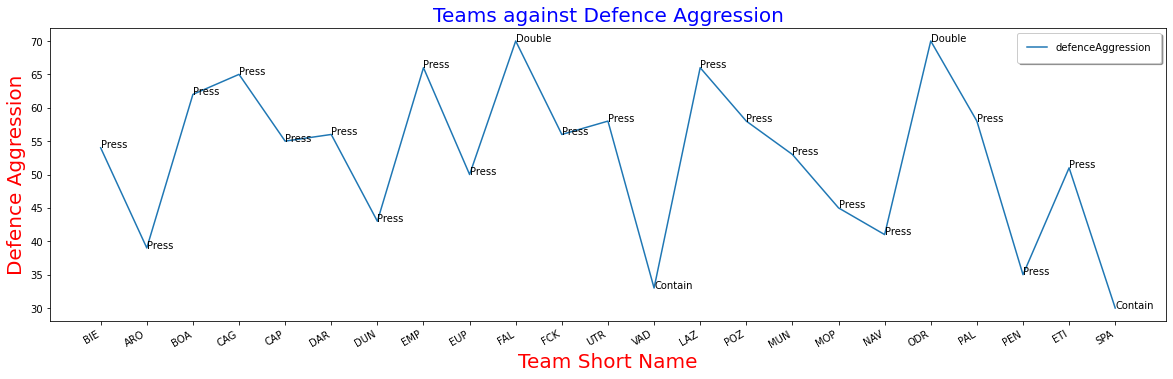

In [83]:
#df from needed columns only
Aggregationdf = Team_Attributesdf[['year' , 'team_short_name' , 'defenceAggression' , 'defenceAggressionClass']]#.head(10)
Aggregationdf = Aggregationdf.dropna()

#Form Histogram of Defence Aggression
HitogramAttribute(Team_Attributesdf['defenceAggression'] , 'Defence Aggression')

#df for the highest score in build Up Play Passing team
ColumnsAggregation_Names = ['team_short_name' , 'year' , 'defenceAggression' , 'defenceAggressionClass']
ImprovedTeamsAggregationdf = pd.DataFrame(columns = ColumnsAggregation_Names)
print(ImprovedTeamsAggregationdf)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = Aggregationdf[Aggregationdf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['defenceAggression'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsAggregationdf = ImprovedTeamsAggregationdf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsAggregationdf)

#line chart for improved team that enhanced their build up play speed through season they played
VisualizeData('line' , ImprovedTeamsAggregationdf , np.array(ImprovedTeamsAggregationdf['team_short_name']) , 'team_short_name' , 'defenceAggression' , 'defenceAggressionClass' , 'Team Short Name' , 'Defence Aggression' , 'Teams against Defence Aggression')


Get only teams improved in their Defence Aggregation over provided seasons.
</br>
(FAL and PAL) teams are the highest(double) in defence aggregation and (SPA and VAD) teams are the least (contain) in defence aggregation. 

<a id='eda'></a>
## Follow : Exploratory Data Analysis

### Research Question 1 (What teams improved the most over the time period?)
9.Ninth attribute is : Defence Team Width

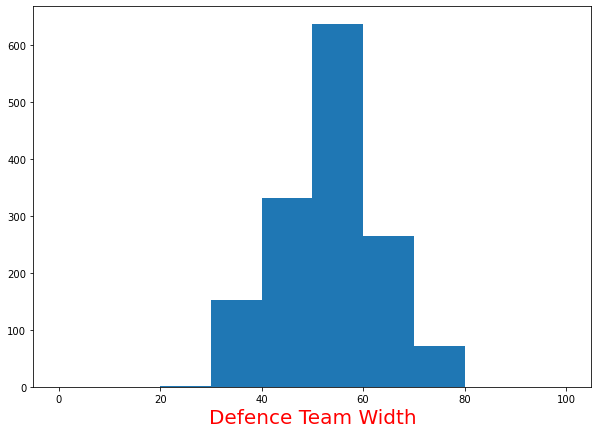

Empty DataFrame
Columns: [team_short_name, year, defenceTeamWidth, defenceTeamWidthClass]
Index: []
     team_short_name  year defenceTeamWidth defenceTeamWidthClass
105              AUG  2015               59                Normal
177              BLB  2015               57                Normal
184              BOA  2015               54                Normal
190              BOC  2015               67                  Wide
425              DOR  2015               55                Normal
341              DAR  2015               41                Normal
364              DUN  2012               63                Normal
403              EUP  2011               55                Normal
417              EXC  2015               36                Normal
418              FAL  2010               70                  Wide
444              VAD  2015               58                Normal
584              HBE  2015               57                Normal
612              INT  2015               6

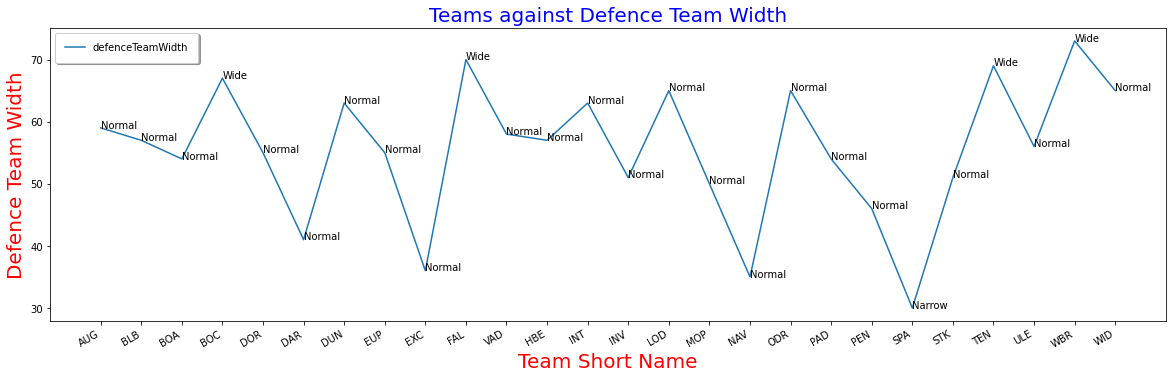

In [46]:
#df from needed columns only
DefenceWidthdf = Team_Attributesdf[['year' , 'team_short_name' , 'defenceTeamWidth' , 'defenceTeamWidthClass']]#.head(10)
DefenceWidthdf = DefenceWidthdf.dropna()

#Form Histogram of Defence Team Width
HitogramAttribute(Team_Attributesdf['defenceTeamWidth'] , 'Defence Team Width')

#df for the highest score in build Up Play Passing team
ColumnsDefenceWidth_Names = ['team_short_name' , 'year' , 'defenceTeamWidth' , 'defenceTeamWidthClass']
ImprovedTeamsDefenceWidthdf = pd.DataFrame(columns = ColumnsDefenceWidth_Names)
print(ImprovedTeamsDefenceWidthdf)
for team in Teams:
    speed = 0
    Improved = False
    TeamYearsdf = DefenceWidthdf[DefenceWidthdf['team_short_name'] == team]
    #print(TeamYearsdf)
    for year in TeamYearsdf.index:
        #print(TeamYearsdf['buildUpPlaySpeed'][year])
        TargetValue = TeamYearsdf['defenceTeamWidth'][year]
        if TargetValue > speed:
            speed = TargetValue
            Improved = True
        else:
            Improved = False
    if Improved == True:
        ImprovedTeamsDefenceWidthdf = ImprovedTeamsDefenceWidthdf.append(TeamYearsdf.iloc[-1:])
print(ImprovedTeamsDefenceWidthdf)

#line chart for improved team that enhanced their build up play speed through season they played
VisualizeData('line' , ImprovedTeamsDefenceWidthdf , np.array(ImprovedTeamsDefenceWidthdf['team_short_name']) , 'team_short_name' , 'defenceTeamWidth' , 'defenceTeamWidthClass' , 'Team Short Name' , 'Defence Team Width' , 'Teams against Defence Team Width')


Get only teams improved in their Defence Team Width over provided seasons.
</br>
(FAL, TEN and WBR) teams are the highest(wide) in defence team eidth and (SPA, NAV and EXC) teams are the least (contain) in defence team width.

### Research Question 2  ( Which players had the most penalties?)

In [15]:
Playerdf = pd.read_csv('Database_Soccer/Player.csv')
Player_Attributesdf = pd.read_csv('Database_Soccer/Player_Attributes.csv')
Player_Attributesdf.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [16]:
#Merge player name to attribute data
Player_Attributesdf = pd.merge(Player_Attributesdf , Playerdf , on='player_api_id' , how='left')
Player_Attributesdf.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [94]:
#df for needed data
PlayerPenalitiesdf = Player_Attributesdf[['player_api_id' , 'player_name' , 'date' , 'penalties']]
print(PlayerPenalitiesdf)

        player_api_id         player_name                 date  penalties
0              505942  Aaron Appindangoye  2016-02-18 00:00:00       48.0
1              505942  Aaron Appindangoye  2015-11-19 00:00:00       48.0
2              505942  Aaron Appindangoye  2015-09-21 00:00:00       48.0
3              505942  Aaron Appindangoye  2015-03-20 00:00:00       47.0
4              505942  Aaron Appindangoye  2007-02-22 00:00:00       47.0
...               ...                 ...                  ...        ...
183973          39902  Zvjezdan Misimovic  2009-08-30 00:00:00       83.0
183974          39902  Zvjezdan Misimovic  2009-02-22 00:00:00       70.0
183975          39902  Zvjezdan Misimovic  2008-08-30 00:00:00       70.0
183976          39902  Zvjezdan Misimovic  2007-08-30 00:00:00       53.0
183977          39902  Zvjezdan Misimovic  2007-02-22 00:00:00       53.0

[183978 rows x 4 columns]


In [91]:
PlayerPenalitiesdf['player_name'].nunique()

10848

In [7]:
PlayerPenalitiesdf.duplicated().sum()

1

In [8]:
PlayerPenalitiesdf.describe()

,player_api_id,penalties
count,183978.000000,183142.000000
mean,135900.617324,55.003986
std,136927.840510,15.546519
min,2625.000000,2.000000
25%,34763.000000,45.000000
50%,77741.000000,57.000000
75%,191080.000000,67.000000
max,750584.000000,96.000000


In [74]:
#Does there is any player have non real value
print(PlayerPenalitiesdf[PlayerPenalitiesdf['penalties'].isna()])

        player_api_id         player_name       date  penalties  year
483             31684    Abdeslam Ouaddou 2007-02-22        NaN  2007
983             29904          Abel Gomez 2007-02-22        NaN  2007
1752            24159        Adam Johnson 2007-02-22        NaN  2007
2089            31916         Adam Rooney 2007-02-22        NaN  2007
2482            37249          Adil Chihi 2007-02-22        NaN  2007
...               ...                 ...        ...        ...   ...
182587          25538      Youssouf Hadji 2007-02-22        NaN  2007
183249          32633  Zbigniew Malkowski 2007-02-22        NaN  2007
183309          33823      Zdenek Pospech 2007-02-22        NaN  2007
183361          25772  Zdravko Kuzmanovic 2007-02-22        NaN  2007
183487          38843          Ze Roberto 2007-02-22        NaN  2007

[836 rows x 5 columns]


In [75]:
PlayerPenalitiesdf = PlayerPenalitiesdf.dropna()
PlayerPenalitiesdf['date'] = pd.to_datetime(PlayerPenalitiesdf['date'])
PlayerPenalitiesdf['year'] = PlayerPenalitiesdf['date'].dt.year
print(PlayerPenalitiesdf)

        player_api_id         player_name       date  penalties  year
0              505942  Aaron Appindangoye 2016-02-18       48.0  2016
1              505942  Aaron Appindangoye 2015-11-19       48.0  2015
2              505942  Aaron Appindangoye 2015-09-21       48.0  2015
3              505942  Aaron Appindangoye 2015-03-20       47.0  2015
4              505942  Aaron Appindangoye 2007-02-22       47.0  2007
...               ...                 ...        ...        ...   ...
183973          39902  Zvjezdan Misimovic 2009-08-30       83.0  2009
183974          39902  Zvjezdan Misimovic 2009-02-22       70.0  2009
183975          39902  Zvjezdan Misimovic 2008-08-30       70.0  2008
183976          39902  Zvjezdan Misimovic 2007-08-30       53.0  2007
183977          39902  Zvjezdan Misimovic 2007-02-22       53.0  2007

[183142 rows x 5 columns]


In [102]:
#sum penalties grouped by player
SortedPenaltiesdf = PlayerPenalitiesdf.groupby(['player_api_id' , 'player_name'] , as_index=False)['penalties'].sum()

#get the highest 10 players in penalties sorted in descending order
SortedPenaltiesdf = SortedPenaltiesdf.sort_values('penalties' , ascending=False)
print(SortedPenaltiesdf)

      player_api_id             player_name  penalties
4087          41269           Alessio Cerci     4314.0
5808         108808         Mario Balotelli     4120.0
4247          41890       Claudio Marchisio     3984.0
1327          26472         Michael Bradley     3813.0
1029          25772      Zdravko Kuzmanovic     3799.0
...             ...                     ...        ...
6898         163893              Rui Vieira       45.0
6908         163985          Ricardo Campos       39.0
8761         258206         Dziugas Bartkus       36.0
3521          38962      Sven van der Jeugt       28.0
7856         192855  Timothy van der Meulen       20.0

[11060 rows x 3 columns]


Previous code display sum of penalties for each player ordered in decending way.
</br>
As shown: Player :
</br>=========================
</br>Alessio Cerci is the most player achiving for penalties over the provided seasons.

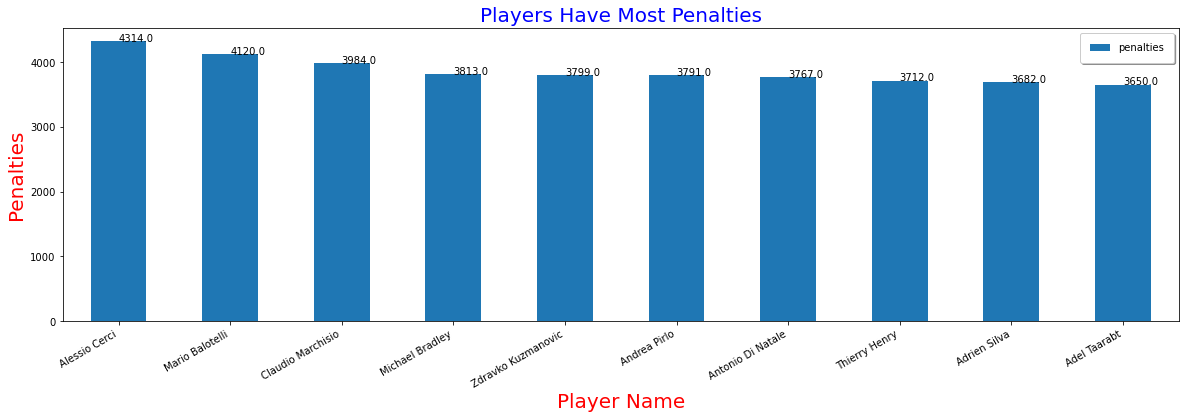

In [78]:
#Show each player's penalties over provided seasons in some of chart as data is very huge
#finaldf = PlayerPenalitiesdf.groupby(['player_name'] , as_index=False)['penalties'].sum()

#index = len(finaldf)
#ChartSizeRow = 30
#if index > 0:
 #   ColumnsPenalties_Names = ['player_name' , 'penalties']
    #Partdf = pd.DataFrame(columns = ColumnsPenalties_Names)
    #for i in range(1 , index):
        #Partdf = Partdf.append(finaldf.iloc[i])
        #if len(Partdf) == ChartSizeRow:
VisualizeData('bar' , SortedPenaltiesdf , np.array(SortedPenaltiesdf['player_name']) , 'player_name' , 'penalties' , 'penalties' , 'Player Name' , 'Penalties' , 'Players Have Most Penalties')
            #Partdf.drop(Partdf.index , inplace=True)
            


The most player had penalties is: 
</br>==========================================
</br>           Alessio Cerci     4314.0 penalty.
</br>The second one: Mario Balotelli       4120 penalty.
</br>The third one : Claudio Marchisio     3984 penalty.
</br>The forth one : Michael Bradley       3813 penalty.
</br>The fifth one : Zdravko Kuzmanovic    3799 penalty.
</br>The sixth one : Andrea Pirlo          3791 penalty.
</br>The seventh one :Antonio Di Natale    3767 penalty.
</br>The eighth one : Thierry Henry        3712 penalty.
</br>The ninth one : Adrien Silva          3682 penalty.
</br>The ten one : Adel Taarabt            3650 penalty.


### Research Question 3  ( What team attributes lead to the most victories?)
Need to get the most team win matches in the provided seasons then, get it's attributes it achieve

In [22]:
#Get matches data to get the winner team in each match
Matchdf = pd.read_csv('Database_Soccer/Match.csv')
MatchTeam_Attributesdf = pd.read_csv('Database_Soccer/Team_Attributes.csv')
Matchdf.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [82]:
#Shown previously as team_attribute (build up play dribbling) have non real values for some teams in some seasons
#Needed columns to have real values
print(Matchdf[Matchdf['home_team_api_id'].isna()])
print(Matchdf[Matchdf['away_team_api_id'].isna()])
print(Matchdf[Matchdf['home_team_goal'].isna()])
print(Matchdf[Matchdf['away_team_goal'].isna()])

Empty DataFrame
Columns: [id, country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal, home_player_X1, home_player_X2, home_player_X3, home_player_X4, home_player_X5, home_player_X6, home_player_X7, home_player_X8, home_player_X9, home_player_X10, home_player_X11, away_player_X1, away_player_X2, away_player_X3, away_player_X4, away_player_X5, away_player_X6, away_player_X7, away_player_X8, away_player_X9, away_player_X10, away_player_X11, home_player_Y1, home_player_Y2, home_player_Y3, home_player_Y4, home_player_Y5, home_player_Y6, home_player_Y7, home_player_Y8, home_player_Y9, home_player_Y10, home_player_Y11, away_player_Y1, away_player_Y2, away_player_Y3, away_player_Y4, away_player_Y5, away_player_Y6, away_player_Y7, away_player_Y8, away_player_Y9, away_player_Y10, away_player_Y11, home_player_1, home_player_2, home_player_3, home_player_4, home_player_5, home_player_6, home_player_7, home_player_8, home_player_

In [23]:
#Get needed data from match to get the winner team
Matchdf = Matchdf.dropna()
MatchDatadf = Matchdf[['id' , 'home_team_api_id' , 'away_team_api_id' , 'home_team_goal' , 'away_team_goal']]
MatchDatadf['WinningTeam'] = ""

print(MatchDatadf)

          id  home_team_api_id  away_team_api_id  home_team_goal  \
3248    3249              9825              8472               0   
3249    3250              8668             10260               1   
3250    3251              9879              9850               5   
3251    3252              8456              8466               3   
3252    3253             10261              8586               2   
...      ...               ...               ...             ...   
23412  23413              8581              7878               3   
23413  23414              8394              8302               2   
23414  23415              8661              8633               0   
23415  23416              9910              9783               1   
23416  23417              8370              8634               0   

       away_team_goal WinningTeam  
3248                0              
3249                0              
3250                0              
3251                2              
325

C:\Users\hala\AppData\Local\Temp/ipykernel_2464/3766272700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchDatadf['WinningTeam'] = ""


In [25]:
#Calculate the winner team
#Form df with match id and winner team id
WinningTeamColumns_Names = ['id' , 'WinningTeam']
WinningTeamdf = pd.DataFrame(columns = WinningTeamColumns_Names)

for index , match in MatchDatadf.iterrows():
    HomeGoal = match['home_team_goal']
    AwayGoal = match['away_team_goal']
    HomeTeamId = match['home_team_api_id']
    AwayTeamId = match['away_team_api_id']
    MatchId = match['id']
    if HomeGoal > AwayGoal:
        WinningTeamdf = WinningTeamdf.append({'id': MatchId , 'WinningTeam': HomeTeamId} , ignore_index=True)
    elif AwayGoal > HomeGoal:
        WinningTeamdf = WinningTeamdf.append({'id': MatchId , 'WinningTeam': AwayTeamId} , ignore_index=True)
        
print(WinningTeamdf)

         id WinningTeam
0      3250        8668
1      3251        9879
2      3252        8456
3      3253       10261
4      3254       10003
...     ...         ...
1299  23412        8305
1300  23413        8581
1301  23414        8394
1302  23415        8633
1303  23417        8634

[1304 rows x 2 columns]


In [27]:
#Get the most frequent team to win listed matches
print(WinningTeamdf['WinningTeam'].value_counts().idxmax())

9823


In [26]:
#Get team attributes recorded for the most frequent team to win matches
MaxId = WinningTeamdf['WinningTeam'].value_counts().idxmax()
print(MaxId)
VictoriesAttributes = MatchTeam_Attributesdf[MatchTeam_Attributesdf['team_api_id'] == MaxId]
print(VictoriesAttributes)

9823
      id  team_fifa_api_id  team_api_id                 date  \
142  143                21         9823  2010-02-22 00:00:00   
143  144                21         9823  2011-02-22 00:00:00   
144  145                21         9823  2012-02-22 00:00:00   
145  146                21         9823  2013-09-20 00:00:00   
146  147                21         9823  2014-09-19 00:00:00   
147  148                21         9823  2015-09-10 00:00:00   

     buildUpPlaySpeed buildUpPlaySpeedClass  buildUpPlayDribbling  \
142                65              Balanced                   NaN   
143                42              Balanced                   NaN   
144                47              Balanced                   NaN   
145                56              Balanced                   NaN   
146                37              Balanced                  34.0   
147                45              Balanced                  24.0   

    buildUpPlayDribblingClass  buildUpPlayPassing buildUpPlayP

                Attribute  Score     Class
0        buildUpPlaySpeed   45.0  Balanced
1    buildUpPlayDribbling   24.0    Little
2      buildUpPlayPassing   28.0     Short
3  chanceCreationShooting   22.0    Little
4         defencePressure   72.0      High
5       defenceAggression   53.0     Press
6        defenceTeamWidth   59.0    Normal


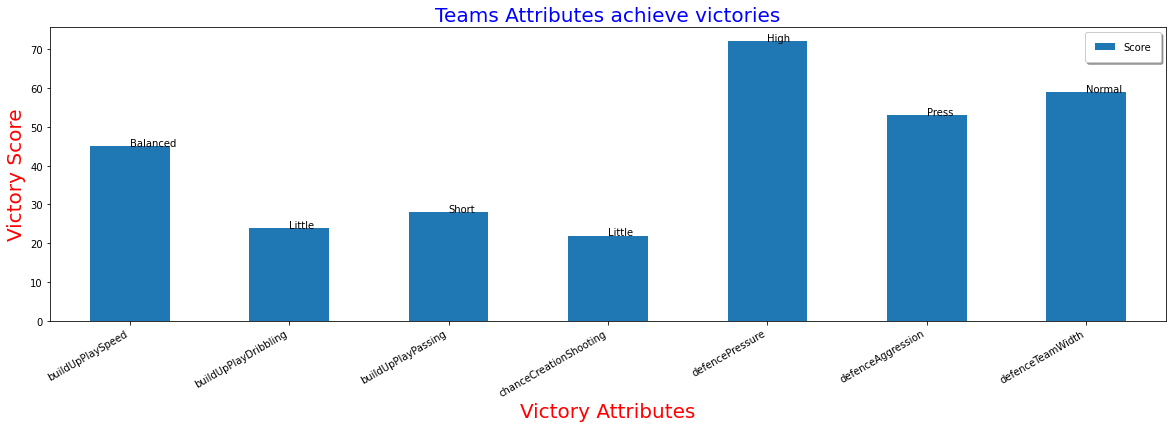

In [27]:
#Chart for these attributes to show it.
Chartdf = pd.DataFrame({
    'Attribute': ['buildUpPlaySpeed' , 'buildUpPlayDribbling' , 'buildUpPlayPassing' , 'chanceCreationShooting' , 'defencePressure' , 'defenceAggression' , 'defenceTeamWidth']
    , 'Score' : [VictoriesAttributes.iloc[-1]['buildUpPlaySpeed'] , VictoriesAttributes.iloc[-1]['buildUpPlayDribbling'] , VictoriesAttributes.iloc[-1]['buildUpPlayPassing'] , VictoriesAttributes.iloc[-1]['chanceCreationShooting'] , VictoriesAttributes.iloc[-1]['defencePressure'] , VictoriesAttributes.iloc[-1]['defenceAggression'] , VictoriesAttributes.iloc[-1]['defenceTeamWidth']]
    , 'Class' : [VictoriesAttributes.iloc[-1]['buildUpPlaySpeedClass'] , VictoriesAttributes.iloc[-1]['buildUpPlayDribblingClass'] , VictoriesAttributes.iloc[-1]['buildUpPlayPassingClass'] , VictoriesAttributes.iloc[-1]['chanceCreationShootingClass'] , VictoriesAttributes.iloc[-1]['defencePressureClass'] , VictoriesAttributes.iloc[-1]['defenceAggressionClass'] , VictoriesAttributes.iloc[-1]['defenceTeamWidthClass']]
})
print(Chartdf)
Xaxis = range(0 , 7)
Xlabels = ['Build Up Play Speed' , 'Build Up Play Dribbling' , 'Build Up Play Passing' , 'Chance Creation Shooting' , 'Defence Pressure' , 'Defence Aggression' , 'Defence Team Width']
VisualizeData('bar' , Chartdf , np.array(Chartdf['Attribute']) , 'Attribute' , 'Score' , 'Class' , 'Victory Attributes' , 'Victory Score' , 'Teams Attributes achieve victories')

As shown in chart and the above data, team attributes lead to victories are: 
</br>
==========================================================
</br>Balanced level: in Build Up Play Speed, </br>High level: in Defence Pressure, </br>Press level: in Defence Aggregation and, </br>Normal level: in Defence Team Width

<a id='conclusions'></a>
## Conclusions

Results:
</br>
========
1. What teams improved the most over the time period?
    The first variable is about teams. How to measure team improvement over time period (2008 - 2016).
    Some keys we can use to measure team improvement from season to another such as:
        1. build Up Play Speed Class --> CAP team scored the fastest in speed : 80.
        2. build Up Play Dribbling Class --> MET team scored the lots in dribbling : more than 70.
        3. build Up Play Passing Class --> DAR team scored the longest in passing : more than 75.
        4. build Up Play Positioning Class --> 
        5. Chance Creation Passing Class --> SPA team scored the most safe in creation passing : less than 30.
        6. Chance Creation Crossing Class --> LAZ team scored the lots in creation crossing : more than 70.
        7. Chance Creation Shooting Class --> JUV team scored the lots in creation shooting : 80.
        8. Chance Creation Positioning Class --> 
        9. Defence Pressure Class --> BMU team scored the highest in defence pressure : more than 70.
        10. Defence Aggression Class --> (FAL and PAL) teams are the highest(double) in defence aggregation and (SPA and VAD)
            teams are the least (contain) in defence aggregation. 
        11. Defence Team Width Class --> (FAL, TEN and WBR) teams are the highest(wide) in defence team eidth and (SPA, NAV and             EXC) teams are the least (contain) in defence team width.
        12. Defence Defender Line Class --> 
2.  Which players had the most penalties?
    Try to find the player who got the most penalties over provided seasons.
    Player: Alessio Cerci has the most penalties : 4314.
    and the visualization of this shows the most 10 players achieve penalties.
3. What team attributes lead to the most victories? 
    Need to know attributes of team that achieve the most victories over the provided seasons.
    Team attributes lead to victories are: 
    </br>
============================
    </br>
    1. Balanced level: in Build Up Play Speed, 
    </br>2. High level: in Defence Pressure, 
    </br>3. Press level: in Defence Aggregation and, 
    </br>4. Normal level: in Defence Team Width.
    
Limitations:
</br>
=========
1. What teams improved the most over the time period?
    Build Up Play Dribbling --> has some non real values as about 969 rows of teams and seasons have no value in build up play     dribbling.
2. Which players had the most penalties?
    Penalties --> has some non real values as abount 836 rows have no value in penalties.